### Basic Concept of NetCDF Files

NetCDF (Network Common Data Form) is a file format designed for storing and sharing array-oriented scientific data. It is widely used in fields such as meteorology, oceanography, and climate science. Below are the key concepts:

1. **Self-Describing Format**: NetCDF files contain metadata that describe the data, including dimensions, variables, and attributes.

2. **Efficient Storage**: It is optimized for storing large, multi-dimensional datasets (e.g., temperature, pressure, time, latitude, longitude).

3. **Platform-Independent**: NetCDF files can be read and written on different platforms without modification.

4. **Data Model**:
    - **Dimensions**: Define the axes of the data (e.g., time, latitude, longitude).
    - **Variables**: Contain the actual data values, associated with dimensions.
    - **Attributes**: Provide additional information about the data (e.g., units, descriptions).

5. **Common Use Cases**:
    - Storing climate model outputs.
    - Sharing observational data from sensors or satellites.
    - Archiving large-scale simulation results.

NetCDF files are supported by various programming languages and tools, making them a versatile choice for scientific data management.

![Data structure of a netCDF File](attachment:GUID-D872A4C3-749E-4159-A6C0-FB6D3B47C5D8-web.gif)

To work with NetCDF (NC) files in Python, you can use the xarray library, which provides an easy and efficient way to handle multi-dimensional data. Here's a quick guide:

1. **Install xarray**: Ensure you have xarray installed (you can do this via conda and the environment.yml file in the git repository)

2. **Open an NC file**: Use xarray.open_dataset() to load the NetCDF file into an xarray.Dataset object. This object allows you to explore and manipulate the data.

3. **Explore the data**: You can inspect the variables, dimensions, and attributes of the dataset using methods like .variables, .dims, and .attrs.

4. **Access variables**: Access specific variables in the dataset using dictionary-like syntax or dot notation.

5. **Perform operations**: Use xarray's built-in methods for data manipulation, visualization, and analysis.

6. **Save changes**: If you modify the dataset, you can save it back to a NetCDF file using .to_netcdf().

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

Now follows a very basic introduction to netCDF and xarray handelling. As a first step we'll load some data (from the git repository).
# Task1 : Look for the daily mean temperature and add the path file to the code below

In [ ]:
path_folder = '/Users/piamuller/Documents/AppliedLandSurfaceModeling/FinalModelSWBMinclData-main/data/daily_average_temperature/'

path_folder = #add your code here

In [3]:
temp = xr.open_dataset(path_folder+'t2m_mean.daily.calc.era5.0d50_CentralEurope.2000.nc').load()

Hint: In order to open all files within a folder (e.g. all years within the study period) you can use the function <code> xr.open_mfdataset(folderpath+'*.nc', combine='by_coords') </code>.

You can browse through the general data structure of the fill by just calling it:

In [12]:
temp

<xarray.Dataset> Size: 1MB
Dimensions:  (time: 366, lat: 22, lon: 22)
Coordinates:
  * lon      (lon) float64 176B 4.75 5.25 5.75 6.25 ... 13.75 14.25 14.75 15.25
  * lat      (lat) float64 176B 55.25 54.75 54.25 53.75 ... 45.75 45.25 44.75
  * time     (time) datetime64[ns] 3kB 2000-01-01 2000-01-02 ... 2000-12-31
Data variables:
    t2m      (time, lat, lon) float64 1MB 280.6 280.6 280.7 ... 277.7 273.4
Attributes:
    title:              Daily mean surface air temperature (2-meter height)
    version:            ERA5
    reference:          https://cds.climate.copernicus.eu/cdsapp#!/dataset/re...
    created on Server:  2024-04-03 09:14:54.225714
    provided by:        https://cds.climate.copernicus.eu/cdsapp#!/software/a...
    created by:         Hao Huang (hao.huang@ecoclim.uni-freiburg.de)
    creation way:       This dataset has been aggregated at daily frequency (...
    Conventions:        CF-1.7
    institution:        European Centre for Medium-Range Weather Forecasts
    history:            2024-03-22T17:24 GRIB to CDM+CF via cfgrib-0.9.9.1/ec...
    source:             ECMWF

## Visualisation

For the visualisation of the data there is two possible options.

1. Point‐wise time series
Select one or more specific grid points (e.g. a particular latitude–longitude pair, or a small region) and plot how the daily mean temperature evolves over time. This lets you examine temporal features such as seasonal cycles, heat waves, or cold snaps at a fixed location.
2. Spatial maps
Compute aggregated fields (e.g. monthly or seasonal means, anomalies, extremes) and plot them over the entire latitude–longitude grid. This can help you to understand spatial patterns.

# Taks 2:
Visualize the temperature evolution in Freiburg. You can use <code> dataset.sel(lat=..., lon=..., method='nearest') </code> to choose a specific location. 

In [5]:
temp_freiburg = #add your code here
#add code for visualisation
temp.sel(lat=47.999, lon=7.845, method='nearest')

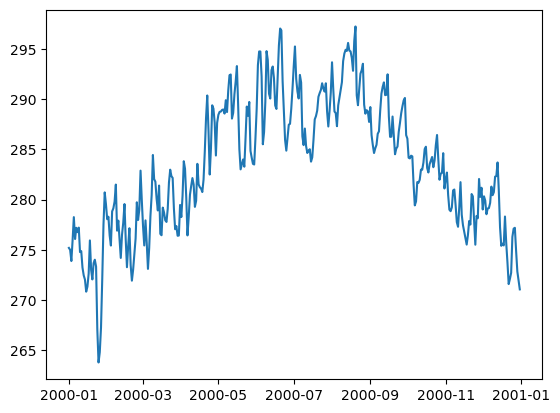

In [6]:
plt.plot(temp_freiburg.time, temp_freiburg.t2m, label='Freiburg')

<xarray.Dataset> Size: 1MB
Dimensions:  (time: 366, lat: 22, lon: 22)
Coordinates:
  * lon      (lon) float64 176B 4.75 5.25 5.75 6.25 ... 13.75 14.25 14.75 15.25
  * lat      (lat) float64 176B 55.25 54.75 54.25 53.75 ... 45.75 45.25 44.75
  * time     (time) datetime64[ns] 3kB 2000-01-01 2000-01-02 ... 2000-12-31
Data variables:
    t2m      (time, lat, lon) float64 1MB 280.6 280.6 280.7 ... 277.7 273.4
Attributes:
    title:              Daily mean surface air temperature (2-meter height)
    version:            ERA5
    reference:          https://cds.climate.copernicus.eu/cdsapp#!/dataset/re...
    created on Server:  2024-04-03 09:14:54.225714
    provided by:        https://cds.climate.copernicus.eu/cdsapp#!/software/a...
    created by:         Hao Huang (hao.huang@ecoclim.uni-freiburg.de)
    creation way:       This dataset has been aggregated at daily frequency (...
    Conventions:        CF-1.7
    institution:        European Centre for Medium-Range Weather Forecasts
    

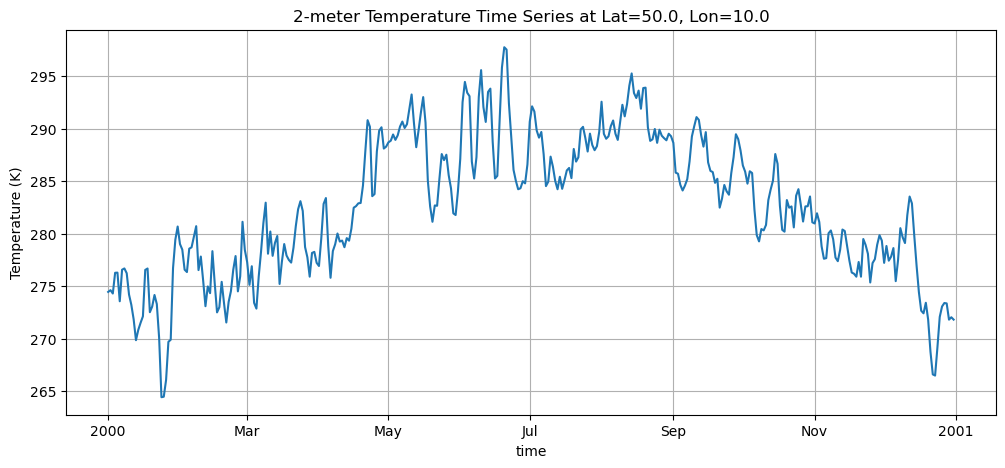

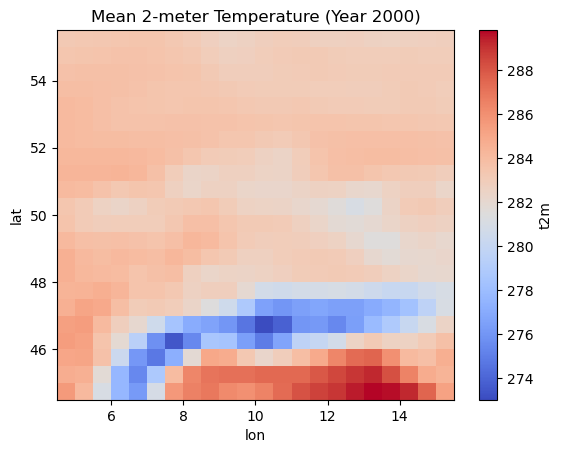

In [8]:
### NetCDF Data Exploration with xarray (ERA5 T2M Dataset)

# 📦 Step 1: Import Libraries
import xarray as xr
import matplotlib.pyplot as plt

# 🗂️ Step 2: Load the Dataset
temp = xr.open_dataset('/Users/piamuller/Documents/AppliedLandSurfaceModeling/FinalModelSWBMinclData-main/data/daily_average_temperature/t2m_mean.daily.calc.era5.0d50_CentralEurope.2000.nc').load()

# 🧭 Step 3: Explore the Dataset
print(temp)

# What are the dimensions?
print("\nDimensions:", temp.dims)

# What are the variables?
print("\nVariables:", list(temp.data_vars))

# 📝 Task 1: Describe the meaning of each dimension and variable based on the dataset output above.

# 🔍 Step 4: Select the Temperature Variable
# Usually, temperature is stored under a variable like 't2m' (2-meter temperature)
t2m = temp['t2m']

# 📝 Task 2: Check units and attributes of 't2m'
print(t2m.attrs)

# 📍 Step 5: Select a Fixed Location (Choose one lat/lon value)
# Let's look at the available coordinates:
print("\nLatitudes:", t2m.lat.values)
print("\nLongitudes:", t2m.lon.values)

# Select closest point to lat=50.0, lon=10.0 (example for Central Europe)
t2m_point = t2m.sel(lat=50.0, lon=10.0, method="nearest")

# 📝 Task 3: What are the coordinates of the selected point?
print(t2m_point)

# 🕒 Step 6: Plot the Time Series
plt.figure(figsize=(12, 5))
t2m_point.plot()
plt.title('2-meter Temperature Time Series at Lat=50.0, Lon=10.0')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.show()

# 📝 Task 4: Convert the temperature from Kelvin to Celsius and re-plot it.

# 📌 Optional Extension:
# Plot a map of the average temperature over the year
mean_t2m = t2m.mean(dim='time')
mean_t2m.plot(cmap='coolwarm')
plt.title('Mean 2-meter Temperature (Year 2000)')
plt.show()

# ✅ Summary Tasks:
# - Describe what information you can extract from a NetCDF file.
# - Reflect on why working with gridded data is useful for land surface modeling.


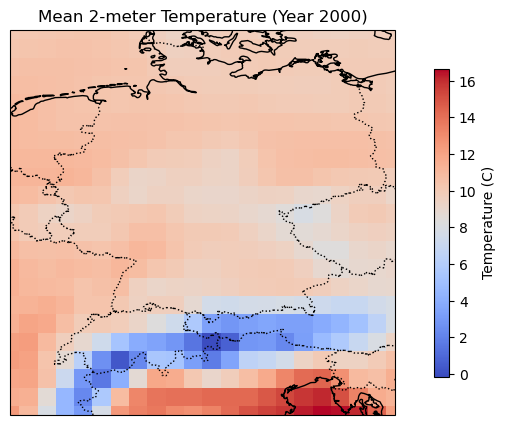

In [9]:
#plot map with cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


# Create a figure with a specific projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set extent to Central Europe using xarray's min and max methods
ax.set_extent([temp.lon.min().item(), temp.lon.max().item(), temp.lat.min().item(), temp.lat.max().item()], crs=ccrs.PlateCarree())
ax.coastlines()

# Add border feature
ax.add_feature(cfeature.BORDERS, linestyle=':')

#conver mean_t2m to celius
mean_t2m_celsius = mean_t2m - 273.15

# Plot the temperature data (make sure to select the correct time step if necessary)
art = plt.pcolormesh(temp['lon'], temp['lat'], mean_t2m_celsius, cmap='coolwarm', shading='auto', transform=ccrs.PlateCarree())

# Add colorbar and title
plt.colorbar(art, ax=ax, orientation='vertical', label='Temperature (C)', shrink=0.8)
plt.title('Mean 2-meter Temperature (Year 2000)')

# Show the plot
plt.show()


## ⚙️ A Word on Computational Performance

Especially if you're working with NetCDF files and want to perform the **same operation across many grid points** (e.g., entire latitude-longitude arrays), your choice of implementation can have a big impact on **execution time and scalability**.

While it's tempting to write nested loops to iterate over latitude and longitude dimensions, this approach becomes inefficient very quickly on large datasets — such as high-resolution climate model output or long-term reanalysis products.

In contrast, `xarray` offers powerful tools like [`apply_ufunc`](https://docs.xarray.dev/en/stable/generated/xarray.apply_ufunc.html), which allow you to **vectorize operations**, reduce overhead, and make better use of computing resources. 

In this section, we'll compare the two approaches to highlight how and when vectorization pays off.



Loop method completed in 0.21240 seconds.
apply_ufunc method completed in 0.00173 seconds.
Apply_ufunc was 122.91 times faster than the loop method.


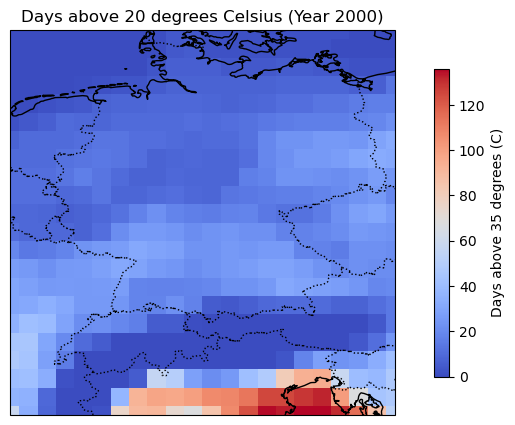

In [41]:
import time

# Function to calculate the number of days above 35°C
def days_above20(temp_data):
    ''' How many days are above 35 degrees?'''
    # Convert temperature from Kelvin to Celsius
    temp_data_celsius = temp_data - 273.15
    # Count days above 35 degrees Celsius
    days_above_35 = (temp_data_celsius > 20).sum()
    return days_above_35

# Load the dataset (adjust the file path accordingly)
temp = xr.open_dataset('/Users/piamuller/Documents/AppliedLandSurfaceModeling/Data/t2m_mean.daily.calc.era5.0d50_CentralEurope.2000.nc').load()

# 1. Loop over each lat/lon (Inefficient method)
start_time = time.time()
days_above_35_loop = []

for lat in temp['lat']:
    for lon in temp['lon']:
        temp_data = temp['t2m'].sel(lat=lat, lon=lon, method="nearest")  # Get data for each point
        days_above_35 = days_above20(temp_data)  # Apply the function
        days_above_35_loop.append((lat, lon, days_above_35))

loop_duration = time.time() - start_time
print(f"Loop method completed in {loop_duration:.5f} seconds.")

# 2. Apply_ufunc (Efficient method)
start_time = time.time()
res = xr.apply_ufunc(
    days_above20, 
    temp['t2m'], 
    input_core_dims=[['time']], 
    vectorize=True,  # This allows for vectorized computation
    output_core_dims=[[]], 
    output_dtypes=[float]
)

apply_ufunc_duration = time.time() - start_time
print(f"apply_ufunc method completed in {apply_ufunc_duration:.5f} seconds.")

print(f"Apply_ufunc was {loop_duration / apply_ufunc_duration:.2f} times faster than the loop method.")

# plot the results on the map
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([temp.lon.min().item(), temp.lon.max().item(), temp.lat.min().item(), temp.lat.max().item()], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
art = plt.pcolormesh(res['lon'], res['lat'], res, cmap='coolwarm', shading='auto', transform=ccrs.PlateCarree())
plt.colorbar(art, ax=ax, orientation='vertical', label='Days above 35 degrees (C)', shrink=0.8)
plt.title('Days above 20 degrees Celsius (Year 2000)')
plt.show()


### 💬 Discussion: Looping vs. `apply_ufunc` in xarray

Of course, for such a simple operation, both methods perform in a reasonable amount of time—especially on a small dataset like our ERA5 slice over Central Europe for a single year. 

However, the **differences in performance and scalability become much more pronounced** as the dataset size and computational complexity increase.

---

### 🧪 When Does It Matter?

The choice becomes critical when:

- You're working with **large spatial domains** (e.g., full Europe, global).
- Your dataset spans **many years or ensemble members**.
- The function you're applying is **more complex** than a simple threshold count (e.g., fitting models, computing indices, applying conditional logic).

In such cases, `apply_ufunc` (especially when combined with Dask for lazy or parallel execution) offers a much more scalable and efficient approach than looping over grid points manually.

***If during your group work you feel like computational time becomes a limiting factor, just know that xarray has some nice built-in features for optimizing performance.***


Display mean temperature over europe, you can use packages like cartopy in order to also add borders and coastlines to the plots.